### 7. Stochastics

Nowadays, stochastics is one of the most important mathematical and numerical disciplines in finance. In the beginning of the modern era of finance, mainly in the 1970s and 1980s, the major goal of financial research was to come up with closed-form solutions for financial models. The requirements have drastically changed in recent years, and many tasks can only be tackled by flexible and efficient numerical methods. Therefore, stochastics in general and Monte Carlo simulation in particular have risen to prominence in the financial field. Roughly speaking, a _stochastic process_ is a sequence of random variables. In that sense, one should expect something similar to a sequence of repeated simulations of a random variable when simulating a process. This part introduces the following topics from a Python perspective:

* **Random numbers**. It all starts with pseudo-random numbers, which build the basis for all simulation efforts;


* **Simulation**. In finance, two simulation tasks are of particular importance: simulation of random variables and of stochastic processes;


* **Valuation**. The two main disciplines when it comes to valuation are the valuation of derivatives with European exercise (at a specific date) and American exercise (over a specific time interval); there are also instruments with Bermudan exercise, or exercise at a finite set of specific dates;


* **Risk measures**. Simulation lends itself pretty well to the calculation of risk measures like value-at-risk, conditional value-at-risk, and credit value adjustments.

#### 7.1. Random numbers

Throughout this part, to generate random numbers, the **numpy.random** (https://numpy.org/doc/stable/reference/random/legacy.html#functions-in-numpy-random) sub-package is used. For convenience, let's import **numpy** and **numpy.random** separately:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import numpy.random as npr

We can generate random integers using **.randint()**(https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html#numpy.random.randint) function:

In [2]:
lower_bound = 0
upper_bound = 10
sample_size = 100

npr.seed(1)
npr.randint(lower_bound, upper_bound, sample_size)

array([5, 8, 9, 5, 0, 0, 1, 7, 6, 9, 2, 4, 5, 2, 4, 2, 4, 7, 7, 9, 1, 7,
       0, 6, 9, 9, 7, 6, 9, 1, 0, 1, 8, 8, 3, 9, 8, 7, 3, 6, 5, 1, 9, 3,
       4, 8, 1, 4, 0, 3, 9, 2, 0, 4, 9, 2, 7, 7, 9, 8, 6, 9, 3, 7, 7, 4,
       5, 9, 3, 6, 8, 0, 2, 7, 7, 9, 7, 3, 0, 8, 7, 7, 1, 1, 3, 0, 8, 6,
       4, 5, 6, 2, 5, 7, 8, 4, 4, 7, 7, 4])

Next, the **.rand()** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy.random.rand) function returns random numbers from the open interval $[0, 1)$ with uniform distribution, in the shape provided as a parameter to the function. The returned object is an **ndarray** object.

In [3]:
sample_size = 10

npr.seed(2)
npr.rand(sample_size)

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728])

In [4]:
rows = 4
columns = 5

npr.seed(3)
npr.rand(rows, columns)

array([[0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695],
       [0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984],
       [0.02987621, 0.45683322, 0.64914405, 0.27848728, 0.6762549 ],
       [0.59086282, 0.02398188, 0.55885409, 0.25925245, 0.4151012 ]])

Such numbers can be easily transformed to cover other intervals of the real line. For instance, if one wants to generate random numbers from the interval $[a, b) = [5, 10)$, one can transform the returned numbers from **.rand()** as shown below - this also works in multiple dimensions due to **NumPy** broadcasting:

In [5]:
a = 5
b = 10
sample_size = 10

npr.seed(4)
npr.rand(sample_size) * (b - a) + a

array([9.8351492 , 7.73616125, 9.8634218 , 8.57407997, 8.48864412,
       6.08044748, 9.88137227, 5.03115128, 6.26491181, 7.17395766])

Also, a random sample can be generated from a given list of numbers, using **.choice()** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html#numpy.random.choice) function:

In [6]:
odd = np.arange(1, 10, 2)
odd

array([1, 3, 5, 7, 9])

In [7]:
probs = np.array([0.1, 0.1, 0.1, 0.1, 0.6])
sample_size = 100

npr.seed(5)
npr.choice(odd, sample_size, replace=True, p=probs)

array([5, 9, 5, 9, 9, 9, 9, 9, 5, 3, 1, 9, 9, 3, 9, 5, 9, 5, 9, 9, 9, 5,
       5, 5, 7, 3, 3, 9, 9, 3, 1, 5, 9, 9, 1, 9, 1, 9, 9, 9, 5, 9, 9, 9,
       1, 9, 9, 7, 9, 9, 9, 9, 1, 1, 3, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1,
       7, 1, 9, 9, 1, 3, 7, 5, 9, 7, 9, 9, 9, 9, 9, 3, 9, 7, 3, 7, 9, 9,
       7, 1, 9, 3, 9, 9, 9, 9, 9, 1, 9, 9])

Data sample from standard normal distribution can be generated using **.standard_normal()** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html#numpy.random.standard_normal) function:

In [8]:
sample_size = 1000

npr.seed(6)
sample_1 = npr.standard_normal(sample_size)
sample_1[:100]

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

In [10]:
sample_1.mean()

-0.008856649433395123

In [11]:
sample_1.std()

0.9646502152637405

Finally, **.normal()** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy.random.normal)
function generates numbers from a normal distribution with specified parameters:

In [12]:
mean = 10
std = 5
sample_size = 1000

npr.seed(7)
sample_2 = npr.normal(mean, std, sample_size)
sample_2[:100]

array([18.45262852,  7.67031315, 10.16410082, 12.03758141,  6.05538486,
       10.01032786,  9.99554807,  1.22637847, 15.08829003, 13.00249258,
        6.87285513,  9.14225869, 12.52649687,  8.69321792,  8.78625461,
        2.73379294, 12.77290156, 10.61940453, 11.37229962,  2.36737734,
       18.25349846, 10.77167768,  8.06430028, 20.1453611 ,  9.77306985,
        2.7466065 ,  7.97386072, -1.44157551, 15.24698275,  7.91762841,
        6.28723237, 15.36235066,  1.74462205, 12.67714678, -0.32207402,
        6.6892033 ,  3.97890077, 17.30987814, 18.83080439,  8.35293124,
       14.20366621,  9.10006799, 12.84030944,  6.23581402,  1.45830398,
        0.98450671, 11.91560926, 21.23797526, 11.34705815,  7.3769769 ,
       19.56009431, 11.18650923, 10.50716993, 11.26288868,  9.33811401,
        8.4526183 ,  2.82518267, 12.50812062,  9.52612275, 15.96542961,
        8.15590766,  0.46815061,  9.50194684, 18.49768648,  8.08288439,
        5.55071569,  4.03204039,  4.74991594,  8.49903132,  4.10

In [13]:
sample_2.mean()

9.857624867144143

In [14]:
sample_2.std()

4.812298348465906

Let's use these functions to graphically illustrate two continuous distributions and two discrete ones:

Text(0.5, 1.0, 'Choice')

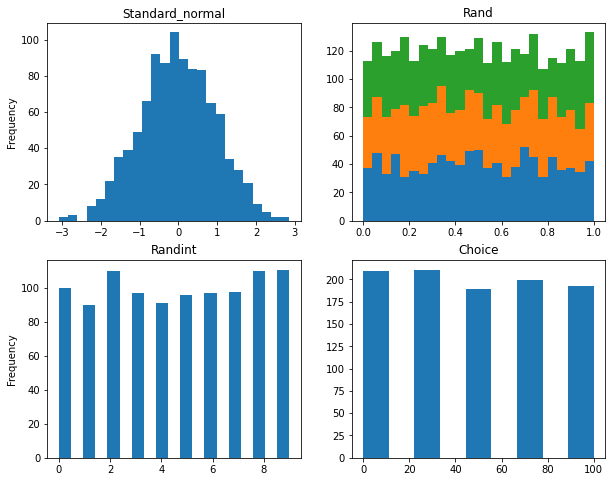

In [15]:
sample_size = 1000

npr.seed(7)
rs_1 = npr.standard_normal(sample_size)
rs_2 = npr.rand(sample_size, 3)
rs_3 = npr.randint(0, 10, sample_size)


numbers = [0, 25, 50, 75, 100]
rs_4 = npr.choice(numbers, sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 8))
ax1.hist(rs_1,
         bins=25)
ax1.set_title('Standard_normal')
ax1.set_ylabel('Frequency')

ax2.hist(rs_2,
         bins=25,
         stacked=True)
ax2.set_title('Rand')

ax3.hist(rs_3,
         bins=19)
ax3.set_title('Randint')
ax3.set_ylabel('Frequency')

ax4.hist(rs_4,
         bins=9)
ax4.set_title('Choice')

Although there is much criticism around the use of normal distributions in finance, they are an indispensable tool and still the most widely used type of distribution in analytical as well as numerical applications. A reason for this is that many financial models directly rest in one way or another on a normal distribution or a log-normal distribution. Moreover, many financial models that do not rest directly on a normal assumption can be discretized, and therewith approximated for simulation purposes, by the use of the normal distribution.

However, **numpy.random** sub-package is also very useful for generating data from other distributions:

* **Binomial** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) with 10 trials with 50% probability of success, repeated 1000 times;


* **Triangular** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html) over the interval -5 to 5 and a peak at 2;


* **Chi-square** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.chisquare.html) with 0.5 degrees of freedom;


* **Log-normal** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html) of an underlying standard normal.

Text(0.5, 1.0, 'Log-normal')

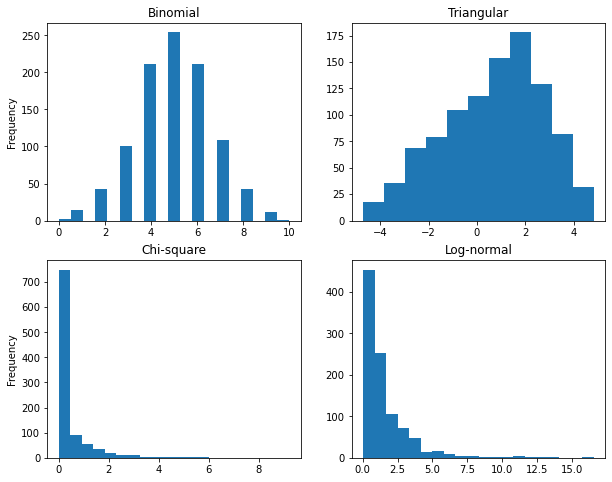

In [17]:
sample_size = 1000

npr.seed(8)
rs_1 = npr.binomial(10, 0.5, sample_size)
rs_2 = npr.triangular(-5, 2, 5, sample_size)
rs_3 = npr.chisquare(df=0.5, size=sample_size)
rs_4 = npr.lognormal(0, 1, sample_size)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 8))
ax1.hist(rs_1, bins=19)
ax1.set_title('Binomial')
ax1.set_ylabel('Frequency')

ax2.hist(rs_2, bins=11)
ax2.set_title('Triangular')

ax3.hist(rs_3, bins=20)
ax3.set_title('Chi-square')
ax3.set_ylabel('Frequency')

ax4.hist(rs_4, bins=20)
ax4.set_title('Log-normal')

Now that we know how to generate random numbers in Python, let's see how we can use them in finance:

#### 7.2. Geometric Brownian motion and the future stock price

A stochastic process $S_t$ is said to follow a GBM if it satisfies the following stochastic differential equation (SDE):

$dS_t = \mu S_tdt + \sigma S_tdZ_t$

Here $Z_t$ is a Wiener process or Brownian motion ($Z\sim N(0,1)$), and $\mu$  (the percentage drift) and $\sigma$  (the percentage volatility) are constants. Given the value of $S_0$, the above SDE has an analytic solution. The solution is the **geometric Brownian motion model of the future stock price**:

$S_t = S_0 exp((\mu−\frac{\sigma^2}{2})t+\sigma\sqrt{t}Z_t)$

#### 7.3. Monte-Carlo simulation

Monte Carlo simulation (MCS) is among the most important numerical techniques in finance, if not the most important and widely used. This mainly stems from the fact that it is the most flexible numerical method when it comes to the evaluation of mathematical expressions, and specifically the valuation of financial derivatives. The flexibility comes at the cost of a relatively high computational burden, since often hundreds of thousands or even millions of complex computations have to be carried out to come up with a single value estimate. We can perfrom static (simulate only final price), as well as dynamic (simulate entire price path) simulations.

##### 7.3.1. Static simulation

Consider **geometric Brownian motion model of the future stock price** from above:

$S_t = S_0 exp((\mu−\frac{\sigma^2}{2})t+\sigma\sqrt{t}Z_t)$

This financial model is parameterized and simulated as follows:

In [18]:
S0 = 100
mu = 0.05
sigma = 0.25
T = 2.0
size = 10000

npr.seed(9)
ST1 = S0 * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(size))  
ST1

array([103.86189867,  93.71899579,  69.97102029, ..., 100.40985188,
       206.09387133, 113.92186323])

Text(0, 0.5, 'Frequency')

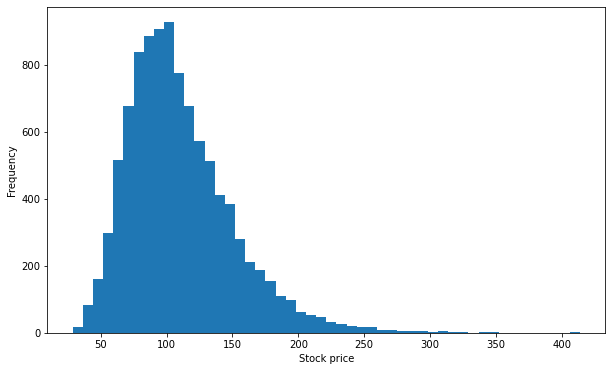

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('Stock price')
plt.ylabel('Frequency')

The histogram suggests that the distribution of the random variable is log-normal. One could therefore also try to use the **npr.lognormal()** (https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html#numpy.random.lognormal) function to directly derive the values for the random variable. In that case, one has to provide the mean and the standard deviation (of the underlying normal distribution) as arguments to the function:

In [20]:
npr.seed(9)
ST2 = S0 * npr.lognormal((mu - 0.5 * sigma ** 2) * T,
                         sigma * np.sqrt(T),
                         size=size)  
ST2

array([103.86189867,  93.71899579,  69.97102029, ..., 100.40985188,
       206.09387133, 113.92186323])

Text(0, 0.5, 'Frequency')

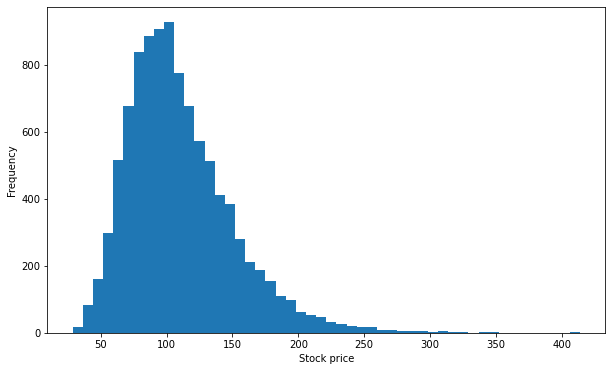

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('Stock price')
plt.ylabel('Frequency')

By visual inspection, both histograms indeed look pretty similar. This can be verified a bit more rigorously by comparing statistical moments of the resulting distributions. To compare the distributional characteristics of simulation results, the **scipy.stats** (https://docs.scipy.org/doc/scipy/reference/stats.html) sub-package and the helper function **print_statistics()**, as defined below, prove useful. The **print_statistics()** function takes two data samples as arguments and prints out their statistics for comparison.

In [22]:
import scipy.stats as scs

scs.describe(ST1)

DescribeResult(nobs=10000, minmax=(28.763407616478382, 413.7361758643125), mean=110.1500452125797, variance=1613.2197032215406, skewness=1.173482212584358, kurtosis=2.5169654675002047)

In [24]:
def print_statistics(sim_1, sim_2):
    stats_1 = scs.describe(sim_1)
    stats_2 = scs.describe(sim_2)
    print('{:12s} {:12s} {:12s}'.format('Statistic', 'Data set 1', 'Data set 2'))
    print(36 * "-")
    print('{:10s} {:12.3f} {:12.3f}'.format('size', stats_1[0], stats_2[0]))
    print('{:10s} {:12.3f} {:12.3f}'.format('min', stats_1[1][0], stats_2[1][0]))
    print('{:10s} {:12.3f} {:12.3f}'.format('max', stats_1[1][1], stats_2[1][1]))
    print('{:10s} {:12.3f} {:12.3f}'.format('mean', stats_1[2], stats_2[2]))
    print('{:10s} {:12.3f} {:12.3f}'.format('std', np.sqrt(stats_1[3]), np.sqrt(stats_2[3])))
    print('{:10s} {:12.3f} {:12.3f}'.format('skew', stats_1[4], stats_2[4]))
    print('{:10s} {:12.3f} {:12.3f}'.format('kurtosis', stats_1[5], stats_2[5]))

print_statistics(ST1, ST2)

Statistic    Data set 1   Data set 2  
------------------------------------
size          10000.000    10000.000
min              28.763       28.763
max             413.736      413.736
mean            110.150      110.150
std              40.165       40.165
skew              1.173        1.173
kurtosis          2.517        2.517


Obviously, the statistics of both simulation results are quite similar (when rounded to three decimals, are exatly alike). The differences are mainly due to what is called the _sampling error_ in simulation.

##### 7.3.2. Dynamic simulation

The **geometric Brownian motion model of the future stock price** can be discretized, with $\Delta t$ being the fixed discretization interval and $Z_t$ being a standard normally distributed random variable:

$S_t = S_{t−\Delta t}exp((\mu−\frac{\sigma^2}{2})\Delta t+\sigma \sqrt{\Delta t}Z_t)$

As before, translation into Python and **NumPy** code is straightforward. The resulting end values for the stock price are log-normally distributed again, as Dynamically simulated geometric Brownian motion at maturity illustrates. The first four moments are also quite close to those resulting from the static simulation approach:

In [31]:
S0 = 100
mu = 0.05
sigma = 0.25
T = 2.0
size = 10000

intervals = 50
dt = T / intervals
S = np.zeros((intervals + 1, size))
S[0] = S0

npr.seed(10)
for t in range(1, intervals + 1):
    S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(size))  

S[:20,:4]

array([[100.        , 100.        , 100.        , 100.        ],
       [106.96476821, 103.71887714,  92.63343739, 100.03308622],
       [ 95.95716673,  99.84720104,  92.27505856,  98.06836937],
       [ 97.64183326,  97.37283604,  91.5490212 ,  97.52886175],
       [ 94.53470022,  98.1230045 ,  99.88554365, 103.39875555],
       [ 92.70378771,  95.7477019 ,  98.36328823, 103.38254315],
       [ 96.58231908, 101.36131029,  98.80578919, 102.21742662],
       [101.11160431,  94.9819936 , 100.33413324, 100.90795422],
       [101.53999687,  93.70825419, 104.7561675 ,  98.18257857],
       [ 96.37947098,  93.01314963,  97.19824353,  95.52433171],
       [ 96.86570028,  93.73453113, 102.95196198,  94.27406256],
       [100.28347545,  91.38860695, 101.15891721, 102.0117565 ],
       [100.47434331, 100.62778876, 104.13407091,  98.44835188],
       [100.39396401, 101.81647908,  99.94015446,  96.02468542],
       [ 97.68266905, 100.96268156,  95.57794143, 101.15525765],
       [ 96.5209916 ,  99

In [27]:
S[:, 0]

array([100.        , 106.96476821,  95.95716673,  97.64183326,
        94.53470022,  92.70378771,  96.58231908, 101.11160431,
       101.53999687,  96.37947098,  96.86570028, 100.28347545,
       100.47434331, 100.39396401,  97.68266905,  96.5209916 ,
       100.49004614, 106.80897747, 111.69065592,  99.98283551,
       106.73345661, 105.58922066, 111.25742775, 106.9924115 ,
       115.53242134, 124.05202276, 118.53689363, 115.03723865,
       114.86842846, 121.54312687, 129.49207073, 132.67417315,
       127.4870588 , 122.57288954, 131.16140811, 132.00389913,
       129.61641814, 128.94805145, 136.34876685, 146.41221967,
       147.80984445, 149.37782759, 156.30895508, 162.49468047,
       186.76657756, 178.25900746, 161.46378898, 163.42891093,
       156.57378878, 161.31135406, 161.80993687])

In [32]:
S[-1]

array([161.80993687, 128.05731149,  53.9786258 , ..., 167.69560163,
        85.9137077 ,  75.42265967])

Text(0, 0.5, 'Frequency')

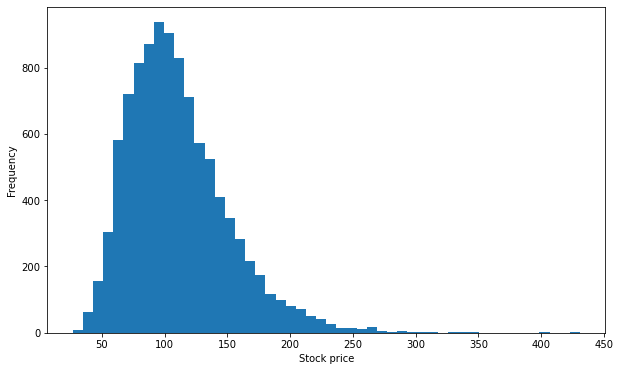

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('Stock price')
plt.ylabel('Frequency')

Below is a comparison of the statistics resulting from the dynamic simulation as well as from the static one:

In [36]:
print_statistics(S[-1], ST2)

Statistic    Data set 1   Data set 2  
------------------------------------
size          10000.000    10000.000
min              26.664       28.763
max             430.959      413.736
mean            110.632      110.150
std              40.307       40.165
skew              1.168        1.173
kurtosis          2.771        2.517


Text(0, 0.5, 'Stock price')

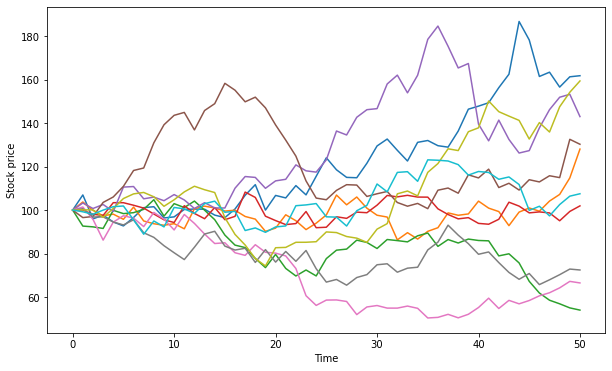

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('Time')
plt.ylabel('Stock price')

Using the dynamic simulation approach not only allows us to visualize paths, but also to value options with American exercise or options whose payoff is path-dependent. One gets the full dynamic picture over time.

#### 7.4. Distribution adjustments

Not only because of the fact that the Python functions used so far generate _pseudo-random_ numbers, but also due to the varying sizes of the samples drawn, resulting sets of numbers might not exhibit statistics close enough to the expected or desired ones. For example, one would expect a set of standard normally distributed random numbers to show a mean of 0 and a standard deviation of 1. Let us check what statistics different sets of random numbers exhibit. To achieve a realistic comparison, the seed value for the random number generator is fixed:

In [39]:
for i in range(1, 11):
    npr.seed(11)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('{:11.8f} {:11.8f}'.format(sn.mean(), sn.std()))

 0.00539982  0.99576331
 0.00984089  1.00038158
 0.00672665  0.99964965
 0.00576721  0.99890943
 0.00357873  0.99959158
 0.00152626  1.00048116
 0.00137039  0.99984375
 0.00031112  0.99896849
 0.00044685  0.99905609
 0.00014174  0.99933036


The results show that the statistics somehow get better the larger the number of draws becomes. But they still do not match the desired ones, even in our largest sample. Fortunately, there are easy-to-implement, generic variance reduction techniques available to improve the matching of the first two moments of the (standard) normal distribution. The first technique is to use _antithetic variates_. This approach simply draws only half the desired number of random draws, and adds the same set of random numbers with the opposite sign afterward. For example, if the random number generator draws 0.5, then another number with value –0.5 is added to the set. By construction, the mean value of such a data set must equal zero.

With **NumPy** this is concisely implemented by using the **np.concatenate()** (https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function. The following repeats the exercise from before, this time using antithetic variates:

In [40]:
npr.seed(12)
rs_1 = npr.standard_normal(int(10000 / 2))
rs_1 = np.concatenate((rs_1, -rs_1))
rs_1

array([ 0.47298583, -0.68142588,  0.2424395 , ..., -1.09606134,
       -0.21218019,  1.88203038])

In [41]:
np.shape(rs_1)

(10000,)

In [42]:
rs_1.mean()

1.0658141036401502e-18

In [43]:
for i in range(1, 11):
    npr.seed(13)
    rs_2 = npr.standard_normal(i ** 2 * int(10000 / 2))
    rs_2 = np.concatenate((rs_2, -rs_2))
    print('{:11.8f} {:11.8f}'.format(rs_2.mean(), rs_2.std()))

-0.00000000  0.99574078
 0.00000000  0.99880029
-0.00000000  0.99667283
 0.00000000  1.00094209
 0.00000000  1.00287045
 0.00000000  1.00213543
 0.00000000  1.00128528
 0.00000000  1.00144966
 0.00000000  1.00040686
 0.00000000  1.00016474


As immediately noticed, this approach corrects the first moment perfectly — which should not come as a surprise due to the very construction of the data set. However, this approach does not have any influence on the second moment, the standard deviation. Using another variance reduction technique, called _moment matching_ or *normalization*, helps correct in one step both the first and second moments:

In [44]:
npr.seed(14)
rs_3 = npr.standard_normal(10000)
rs_3

array([1.55133911, 0.07918602, 0.17397653, ..., 0.60236022, 0.78097214,
       0.83192452])

In [45]:
rs_3.mean()

-0.005060364724256151

In [46]:
rs_3.std()

1.0149663863911171

In [47]:
rs_new = (rs_3 - rs_3.mean()) / rs_3.std()
rs_new

array([1.53344928, 0.08300412, 0.17639687, ..., 0.59846375, 0.77444191,
       0.82464296])

In [48]:
rs_new.mean()

1.4210854715202004e-17

In [49]:
rs_new.std()

1.0

By subtracting the mean from every single random number and dividing every single number by the standard deviation, the set of random numbers matches the desired first and second moments of the standard normal distribution (almost) perfectly.

#### 7.5. Option valuation

One of the most important applications of Monte Carlo simulation is the valuation of _contingent claims_ (options and other derivatives). A financial option embodies the right to buy (call option) or sell (put option) a specified financial instrument at a given maturity date (European option), or over a specified period of time (American option), at a given price (strike price). Let us first consider the simpler case of European options in terms of valuation.

##### 7.5.1. European options

The payoff of a European call option on a stock at maturity is given by:

$h(S_T) = max(S_T–K,0)$

where $S_T$ is the stock price at maturity date $T$ and $K$ is the strike price. Given a, or in complete markets the, risk-neutral measure, the price of such an option is given by the formula in Pricing by risk-neutral expectation:

$C_0 = e^{−rT}\textbf{E}^Q_0(h(S_T)) = e^{−rT}\int_{0}^{\infty}h(s)q(s)ds$

Risk-neutral Monte Carlo estimator for the European option, where $S^i_T$ is the i-th simulated stock price at maturity:

$C_0 = e^{−rT}\sum_{i=1}^{I} \frac{1}{I}h(S^i_T)$

Consider **simulate()** function that generates random numbers for simulation and **euro_static()** function to evaluate european call options using Mont Carlo simulation. **euro_static()** takes only the strike price as a parameter. Also, only the stock price at maturity is simulated. As a reference, consider the case with a strike price of K=105:

In [65]:
def simulate(M, I):
    #M: number of time intervals for discretization
    #I: number of paths to be simulated
    
    npr.seed(15)
    simulated = npr.standard_normal((M + 1, int(I / 2)))
    simulated = np.concatenate((simulated, -simulated), axis=1)
    simulated = (simulated - simulated.mean()) / simulated.std()
    return simulated

def euro_static(K):
    #K: strike price of the option

    sim = simulate(0, I)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * sim)
    hT = np.maximum(ST - K, 0)
    C0 = np.exp(-r * T) * np.mean(hT)
    return C0

S0 = 100
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

euro_static(K=105)

10.02235752935713

Next, consider the dynamic simulation approach and allow for European put options in addition to the call options. The function **euro_dynamic()** implements the algorithm. The code also compares option price estimates for a call and a put at the same level of strike price:

In [68]:
def euro_dynamic(K, option='call'):
    #K: strike price of the option
    #option: 'call' or 'put'
    
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    sim = simulate(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sim[t])
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    C0 = np.exp(-r * T) * np.mean(hT)
    return C0

S0 = 100
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
M = 50

euro_dynamic(K=110, option='call')

8.003529691341285

In [69]:
euro_dynamic(K=110, option='put')

12.650294896118258

##### 7.5.2. American options

The valuation of American options is more involved compared to European options. In this case, an _optimal stopping_ problem has to be solved to come up with a fair value of the option. The algorithm described in the following is called _Least-Squares Monte Carlo_ (LSM) and is from the paper by Longstaff and Schwartz (2001) (https://people.math.ethz.ch/~hjfurrer/teaching/LongstaffSchwartzAmericanOptionsLeastSquareMonteCarlo.pdf). It can be shown that the value of an American option at any date $t$ is given as: 

$V_t(s) = max(h_t(s),C_t(s))$

where $C_t(s) = \textbf{E}^Q_t(e^{−r\Delta t}V_{t+\Delta t}(S_{t+\Delta t})|S_t=s)$ is the so-called continuation value of the option given an index level of $S_t = s$.

Consider now that we have simulated $I$ paths of the stock price over $M$ time intervals of equal size $\Delta t$. Define $Y_{t,i} = e^{−r\Delta t}V_{t+\Delta t,i}$ to be the simulated continuation value for path $i$ at time $t$. We cannot use this number directly because it would imply perfect foresight. However, we can use the cross section of all such simulated continuation values to estimate the (expected) continuation value by least-squares regression.

Given a set of basis functions $b_d$, where $d = 1,…,D$, the continuation value is then given by the regression estimate $C_{t,i} = \sum_{d=1}^{D} \alpha_{d,t}^*\cdot b_{d}(S_{t,i})$, where the optimal regression parameters $\alpha^*$ are the solution of the least-squares problem (stated in Least-squares regression for American option valuation):

$\min\limits_{α_{1,t},...,α_{D,t}}\frac{1}{I}\sum_{i=1}^{I}(Y_{t,i}−\sum_{d=1}^{D} \alpha_{d,t}\cdot b_{d}(S_{t,i}))^2$

The function **amer_dynamic()** implements the LSM algorithm for both American call and put options: 

In [59]:
def amer_dynamic(K, option='call'):
    #K: strike price of the option
    #option: 'call' or 'put'
    
    dt = T / M
    df = np.exp(-r * dt)
    S = np.zeros((M + 1, I))
    S[0] = S0
    sim = simulate(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sim[t])
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    #LSM algorithm
    V = np.copy(h)
    for t in range(M - 1 , 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    C0 = df * np.mean(V[1])
    return C0

S0 = 100
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
M = 50

amer_dynamic(110, option='call')

7.737256087655123

In [60]:
amer_dynamic(110, option='put')

13.651137992492556

The European value of an option represents a lower bound to the American option’s value. The difference is generally called the _early exercise premium_. What follows, compares European and American option values for the same range of strikes as before, to estimate the early exercise premium. This time with puts:

In [61]:
euro_result = []
amer_result = []
k_list = np.arange(80, 121, 5)

for K in k_list:
    euro_result.append(euro_dynamic(K, 'put'))
    amer_result.append(amer_dynamic(K, 'put'))

euro_result = np.array(euro_result)
amer_result = np.array(amer_result)

euro_result

array([ 1.50829997,  2.45626764,  3.74470946,  5.40145307,  7.44436038,
        9.86652625, 12.6502949 , 15.76492805, 19.17045545])

In [62]:
amer_result

array([ 1.52035018,  2.5133943 ,  3.88350475,  5.68660156,  7.88121871,
       10.54865374, 13.65113799, 17.19640288, 21.06022314])

The following shows that for the range of strikes chosen, the early exercise premium can rise to up to 8% for put options in this case:

(75.0, 125.0)

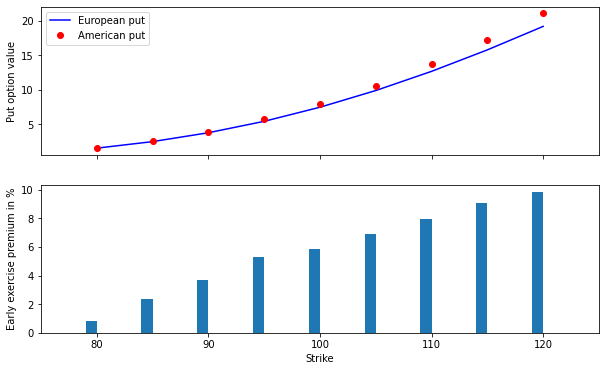

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1,
                               sharex=True,
                               figsize=(10, 6))
ax1.plot(k_list, euro_result,
         'b',
         label='European put')
ax1.plot(k_list, amer_result,
         'ro',
         label='American put')
ax1.set_ylabel('Put option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_result - euro_result) / euro_result * 100, wi)
ax2.set_xlabel('Strike')
ax2.set_ylabel('Early exercise premium in %')
ax2.set_xlim(left=75, right=125)

And for American call option:

(75.0, 125.0)

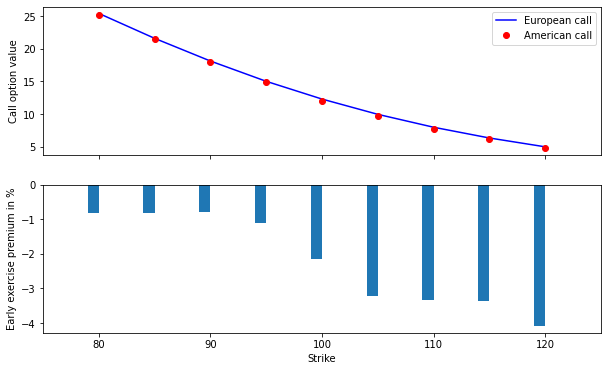

In [64]:
euro_result = []
amer_result = []
k_list = np.arange(80, 121, 5)

for K in k_list:
    euro_result.append(euro_dynamic(K, 'call'))
    amer_result.append(amer_dynamic(K, 'call'))

euro_result = np.array(euro_result)
amer_result = np.array(amer_result)

fig, (ax1, ax2) = plt.subplots(2, 1,
                               sharex=True,
                               figsize=(10, 6))
ax1.plot(k_list, euro_result,
         'b',
         label='European call')
ax1.plot(k_list, amer_result,
         'ro',
         label='American call')
ax1.set_ylabel('Call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_result - euro_result) / euro_result * 100, wi)
ax2.set_xlabel('Strike')
ax2.set_ylabel('Early exercise premium in %')
ax2.set_xlim(left=75, right=125)

The above result of negative early exercise premium for American call option (on a non-dividend paying stock) makes sense, because we know that it is never optimal to exercise an American call option (on a non-dividend paying stock) early.

**_Exercises._**

**Bootstrapping** is any test or metric that uses random sampling with replacement, and falls under the broader class of resampling methods. This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods.

As an example, assume we are interested in the average (or mean) height of people worldwide. We cannot measure all the people in the global population, so instead we sample only a tiny part of it, and measure that. Assume the sample is of size N; that is, we measure the heights of N individuals. From that single sample, only one estimate of the mean can be obtained. In order to reason about the population, we need some sense of the variability of the mean that we have computed. The simplest bootstrap method involves taking the original data set of heights, and, using a computer, sampling from it to form a new sample (called a 'resample' or bootstrap sample) that is also of size N. The bootstrap sample is taken from the original by using sampling with replacement (e.g. we might 'resample' 5 times from [1,2,3,4,5] and get [2,5,4,4,1]), so, assuming N is sufficiently large, for all practical purposes there is virtually zero probability that it will be identical to the original 'real' sample. This process is repeated a large number of times (typically 1,000 or 10,000 times), and for each of these bootstrap samples we compute its mean (each of these are called bootstrap estimates). We now can create a histogram of bootstrap means. This histogram provides an estimate of the shape of the distribution of the sample mean from which we can answer questions about how much the mean varies across samples.

Exercise 1. Plot a histogram of bootstrap means of the following data (test scores).

Text(0, 0.5, 'Frequency')

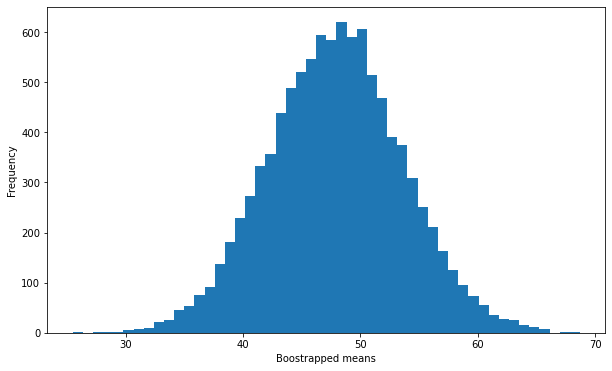

In [70]:
import numpy.random as npr
import matplotlib.pyplot as plt

npr.seed(5)
scores = npr.rand(20).round(2) * 100
means=[]
for i in range(10000):
    npr.seed(i)
    mean=npr.choice(scores, len(scores),replace=True).mean()
    means.append(mean)
    
plt.figure(figsize=(10,6))
plt.hist(means,bins=50)
plt.xlabel('Boostrapped means')
plt.ylabel('Frequency')

Exercise 2. Create a function that would calculate the value of an option (both European and American) using binomial model.

In [94]:
import numpy as np

def binomial_me(K,option='call', origin='euro'):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    R= np.exp(r*dt)
    q = (R - d) / (u-d)
    df = np.exp(-r*dt)
    
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d
        
    C = np.zeros(N+1)
    if (origin=='euro'):
        if(option=='call'):
            for j in range(0,N+1):
                C[j] = max(0, S[j]-K)
        elif(option=='put'):
            for j in range(0,N+1):
                C[j] = max(0, K-S[j])
    elif (origin=='amer'):
        if(option=='call'):
            for j in range(0,N+1):
                C[j] = max(S[j],max(0, S[j]-K))
        elif(option=='put'):
            for j in range(0,N+1):
                C[j] = max(S[j], max(0, K-S[j]))
            
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = df * ( q*C[j+1] + (1-q)*C[j] )
    return C[0]
    

def binomial(K,option='call', origin='euro'):
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    R= np.exp(r*dt)
    q = (R-d)/(u-d)
    bt = [[0 for j in range(i+1)] for i in range(M+1)]
    
    for i in range(M,-1,-1):
        for j in range(i+1):
            if option=='call':
                bt[i][j]=max(S0*u**j*d**(i-j)-K,0)
            else:
                bt[i][j]=max(-S0*u**j*d**(i-j)+K,0)

    for i in range (M-1,-1,-1):
        for j in range(i+1):
            if origin=='euro':
                bt[i][j]=np.exp(-r*dt)*(q*bt[i+1][j+1]+(1-q)*bt[i+1][j])
            else:
                bt[i][j]=max(bt[i][j], np.exp(-r*dt)*(q*bt[i+1][j+1]+(1-q)*bt[i+1][j]))  
    return bt[0][0]

S0=100
r=0.05
sigma=0.5
T=1.0
N=50
print(binomial_me(110,'call','euro'))
print(binomial(110,'call','euro'))

18.03212226085159
18.032122260851615


Exercise 3. Using the above **binomial()** function, generate 'Early exercise premium' charts for both call and put options.

(75.0, 125.0)

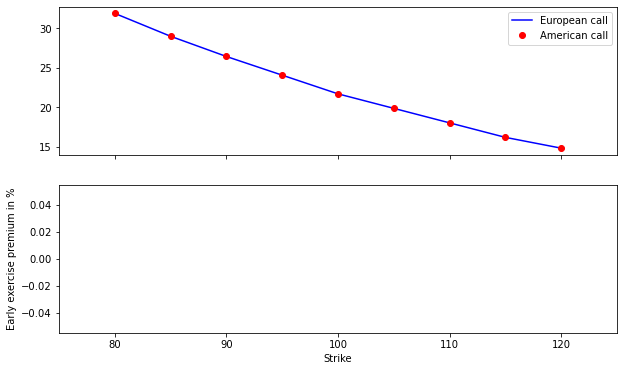

In [100]:
euro_res=[]
amer_res=[]

k_list=np.arange(80,121,5)

for k in k_list:
    euro_res.append(binomial(k,'call','euro'))
    amer_res.append(binomial(k,'call','amer'))
    
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True, figsize=(10,6))
ax1.plot(k_list, euro_res,
         'b',
         label='European call')
ax1.plot(k_list, amer_res,
         'ro',
         label='American call')
ax1.set_label('Call option value')
ax1.legend(loc=0)
wi=1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('Strike')
ax2.set_ylabel('Early exercise premium in %')
ax2.set_xlim(left=75, right=125)
